# Введение в анализ данных
## Домашнее задание 2. `Pandas` и `Seaborn`


**Правила:**

* Дедлайн **30 апреля 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту `mipt.stats@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 2"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `2.N.ipynb` и `2.N.pdf`, где `N` -- ваш номер из таблицы с оценками. *pdf-версию можно сделать с помощью Ctrl+P. Пожалуйста, посмотрите ее полностью перед отправкой. Если что-то существенное не напечатается в pdf, то баллы могут быть снижены.*
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код при проверке запускаться не будет.

**Баллы за задание:**

Легкая часть (достаточно на "хор"):

* Задача 1 -- 4 балла
* Задача 2 -- 2 балла

Сложная часть (необходимо на "отл"):

* Задача 3 -- 5 баллов
* Задача 4 -- 3 балла
* Задача 5 -- 8 баллов

Баллы за разные части суммируются отдельно, нормируются впоследствии также отдельно. Иначе говоря, 1 балл за легкую часть может быть не равен 1 баллу за сложную часть.

In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3)
%matplotlib inline

## Легкая часть

### Задача 1

Представьте, что вы министр образования страны котиков. Вам нужно решить какие школы лучше: маленькие или большие.

Вы решили, что нужно сравнить их по результатам единого кошачьего экзамена (ЕКЭ). Предлагается посмотреть на средний результат по школам: отсортировать по нему и сделать выводы исходя из топ 10 лучших школ.

Вам дан датасет `cat_exam_data.csv`

Описание данных:

* `school` -- номер школы;
* `test_score` -- результат одного ученика из этой школы;
* `number_of_students` -- кол-во учеников в школе.

Приведены данные по всем ученикам из 500 школ страны котиков.

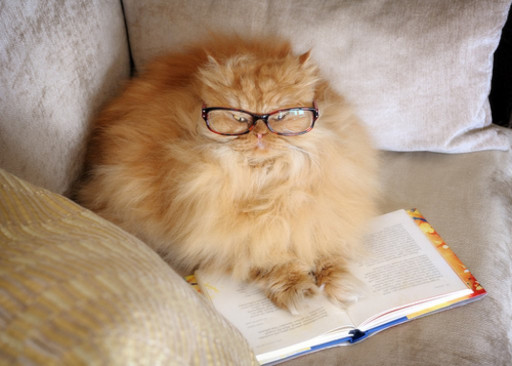

Загрузите датасет с результатами экзамена и посмотрите на первые пять строк.

Это можно сделать с помощью методов  <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html">read_csv</a> и <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html">head</a>.

In [350]:
exam_results = pd.read_csv('cat_exam_data.csv')
exam_results.head(5)

,school,test_score,number_of_students
0,26,39.0,965
1,54,64.0,1483
2,356,64.0,1055
3,108,68.0,1806
4,298,78.0,971


Проверьте, что в данных нет пропусков (`NaN`). Если они есть:
* проверьте в каком столбце;
* удалите их.

Могут помочь методы <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html">isna</a> и <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html">dropna</a>.

In [351]:
exam_results.isna().any()

school                False
test_score             True
number_of_students    False
dtype: bool

In [352]:
exam_results.dropna(inplace=True)

Посчитайте описательные статистики (среднее, мин, макс, и тд.) по колонкам в таблице с помощью одной функции:

In [353]:
exam_results.describe()

,school,test_score,number_of_students
count,501358.000000,501358.000000,501358.000000
mean,250.096795,51.681788,1088.910569
std,144.428420,14.179981,281.016801
min,0.000000,0.000000,156.000000
25%,125.000000,42.000000,890.000000
50%,250.000000,52.000000,1079.000000
75%,377.000000,61.000000,1285.000000
max,499.000000,100.000000,1806.000000


Посчитайте сколько котиков получили 100 баллов:

In [354]:
(exam_results['test_score'] == 100).sum()

51

Выведите информацию о школах, где есть хотя бы один котик, получивший 100 баллов на ЕКЭ.

Отсортируйте эти школы по количеству стобалльников.

Могут помочь методы <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html">groupby</a>, <a href="https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.sort_values.html">sort_values</a>, <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transform.html">transform</a> и <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.count.html">count</a>.

In [355]:
schools = exam_results[exam_results['test_score'] == 100].groupby(['school', 'number_of_students']).count().rename({'test_score':'number_of_smart_cats'}, axis=1)
schools.sort_values('number_of_smart_cats')

,,number_of_smart_cats
school,number_of_students,
4,1015,1
302,1517,1
303,701,1
315,580,1
328,789,1
342,920,1
346,913,1
351,1224,1
357,1003,1


Посчитайте средний результат каждой из школ и посмотрите на результат:

Может помочь метод <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html">mean</a>.

In [356]:
schools = exam_results.groupby(['school', 'number_of_students']).mean().rename({'test_score':'average'}, axis=1)
schools

,,average
school,number_of_students,
0,418,52.294258
1,1209,52.028950
2,1035,51.751451
3,1245,51.566265
4,1015,51.025641
...,...,...
495,1139,50.933275
496,1209,51.146402
497,1140,51.141228


Отсортируйте школы по среднему результату:

In [357]:
schools.sort_values('average', ascending=False, inplace=True)
schools

,,average
school,number_of_students,
57,560,53.341682
124,598,52.993311
263,669,52.982063
82,555,52.981982
366,773,52.970207
...,...,...
194,774,50.406977
471,960,50.362500
486,800,50.325000


Посмотрите на топ 10 лучших результатов:

In [358]:
schools.head(10)

,,average
school,number_of_students,
57,560,53.341682
124,598,52.993311
263,669,52.982063
82,555,52.981982
366,773,52.970207
465,1179,52.957555
169,858,52.932401
449,357,52.910364
477,808,52.898515


**Вывод:** в топе только одна школа с большим числом учащихся - возможно, размер школы коррелирует с успеваемостью учеников (проверяем в дальнейшем)

Ожидаем, что внизу рейтинга будут только большие школы, давайте это проверим.

Посмотрите теперь на 10 худших школ:

In [359]:
schools.tail(10)

,,average
school,number_of_students,
383,636,50.716981
264,929,50.702906
48,649,50.690293
156,1093,50.641354
394,1079,50.461538
194,774,50.406977
471,960,50.362500
486,800,50.325000
211,351,50.248571


**Вывод:** предположение не подтверждается концом списка - распределение по размерам школ похоже и в для топа, и для конца

Постройте график зависимости среднего результата ЕКЭ от количества учеников:

In [360]:
schools.reset_index(inplace=True)

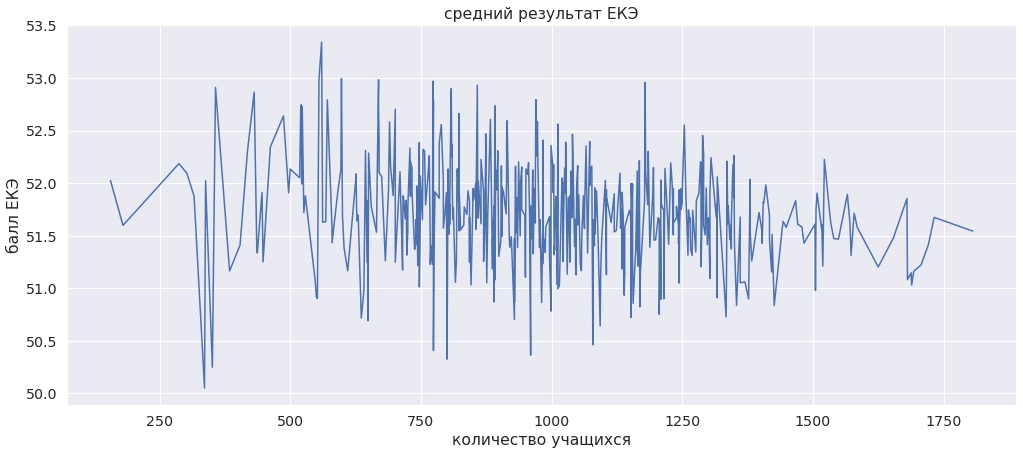

In [361]:
schools.sort_values('number_of_students', inplace=True)
with sns.plotting_context(font_scale=1.5), sns.axes_style("darkgrid"):
    plt.figure(figsize=(17,7))
    plt.plot(schools['number_of_students'], schools['average'])
    plt.xlabel('количество учащихся')
    plt.ylabel('балл ЕКЭ')
    plt.title('средний результат ЕКЭ')
    plt.show()

**Вывод:** нет ясной зависимости балла от кол-ва учащихся

Но как же тогда решить какие школы лучше? 

Сгруппируйте учеников в зависимости от типа школы (<= 1000 учеников == маленькая школа):

In [362]:
small = schools[schools['number_of_students'] <= 1000]
big = schools[schools['number_of_students'] > 1000]

Постройте гистограммы этих двух выборок на одном графике, установив параметры
* `bins=10` --- число бинов гистограммы;
* `alpha=0.5` --- прозрачность бинов.

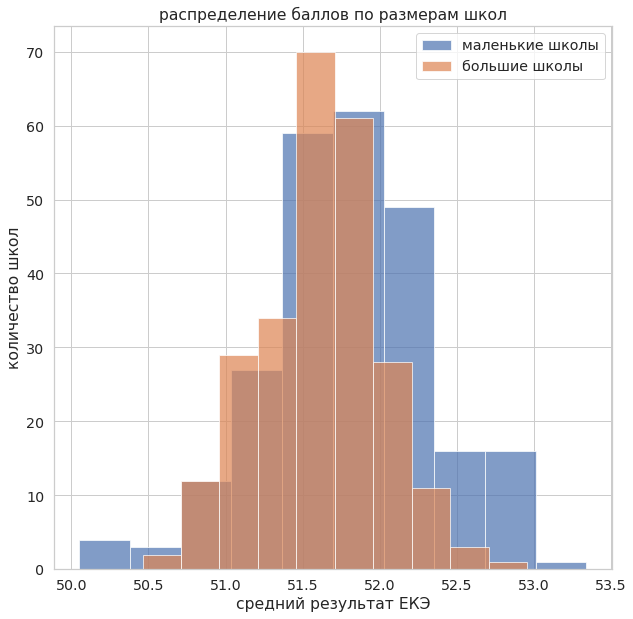

In [363]:
plt.figure(figsize=(10,10))
plt.hist(small['average'], bins=10, alpha=0.7, label='маленькие школы')
plt.hist(big['average'], bins=10, alpha=0.7, label='большие школы')
plt.xlabel('средний результат ЕКЭ')
plt.ylabel('количество школ')
plt.title('распределение баллов по размерам школ')
plt.legend()
plt.show()

**Вывод:** распределения примерно одинаковы (лишь немного смещён пик) - значит, не наблюдается зависимость баллов от размера школы

---

### Задача 2

Задача заключается в работе с данными о трендах на YouTube. В этом вам поможет библиотека `seaborn`, которая была рассмотрена на одной из последних лекций.

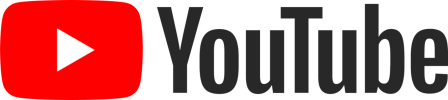


<b>1. Подготовка данных</b>

Скачайте файл `RUvideos_short.csv` с данными о видео в российском сегменте Youtube с 14 ноября по 21 ноября 2017 года. Полная версия данных доступна на <a href="https://www.kaggle.com/datasnaek/youtube-new#RUvideos.csv">kaggle</a>.

Прочитайте данные с помощью библиотеки `pandas` и напечатайте начало таблицы. В колонке `trending_date` записана дата. При чтении таблицы распознайте ее.

In [364]:
parse_time = lambda x: pd.to_datetime(x, format="%y.%d.%m")
videos = pd.read_csv('RUvideos_short.csv', parse_dates=['trending_date'], date_parser=parse_time)

В таблице много лишних данных. Оставьте следующие столбцы:
* `trending_date` -- дата в формате год-день-месяц;
* `category_id` -- категория видео, названия приведены в файле `RU_category_id.json`;
* `views` -- количество просмотров видео;
* `likes` -- количество лайков;
* `dislikes` -- количество дислайков;
* `comment_count` -- количество комментариев.

Из даты оставьте только день. Для этого можно пройтись циклом по всем датам и взять поле `day` у даты. Напечатайте начало таблицы.

In [365]:
videos = videos[['trending_date', 'category_id', 'views', 'likes', 'dislikes', 'comment_count']]
videos['trending_date'] = videos['trending_date'].apply(lambda x: x.day)
videos.head()

,trending_date,category_id,views,likes,dislikes,comment_count
0,14,22,62408,334,190,50
1,14,22,330043,43841,2244,2977
2,14,24,424596,49854,714,2944
3,14,22,112851,3566,122,80
4,14,24,243469,36216,631,1692


<b>2. Некоторая визуализация</b>

Постройте ящики с усами на каждый день по количеству просмотров. Насколько хороший получился график?

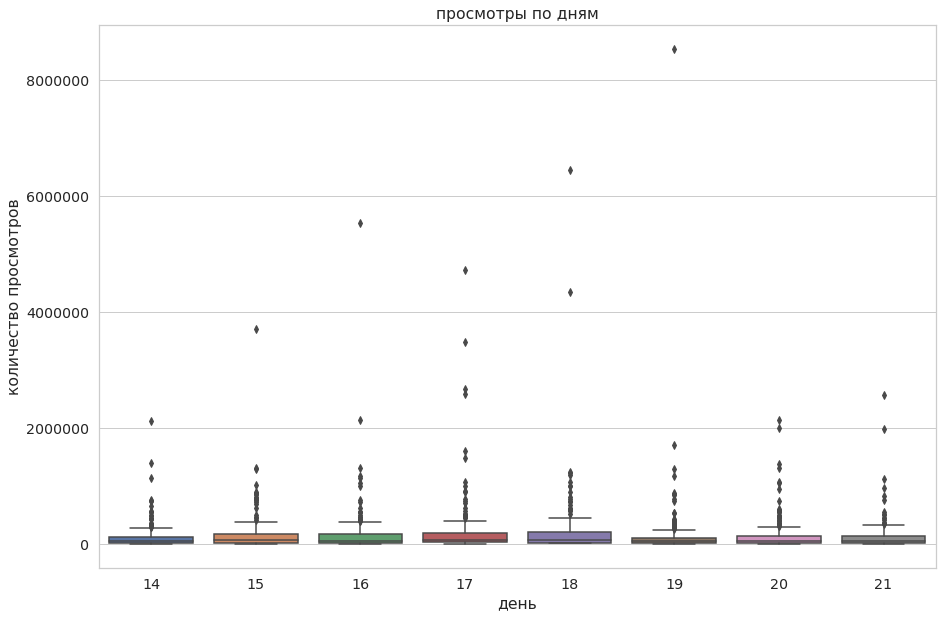

In [366]:
plt.figure(figsize=(15,10))
sns.boxplot(x='trending_date', y='views', data=videos)
plt.xlabel('день')
plt.ylabel('количество просмотров')
plt.title('просмотры по дням')
plt.show()

Исправьте этот недостаток, установив некоторое значение. 

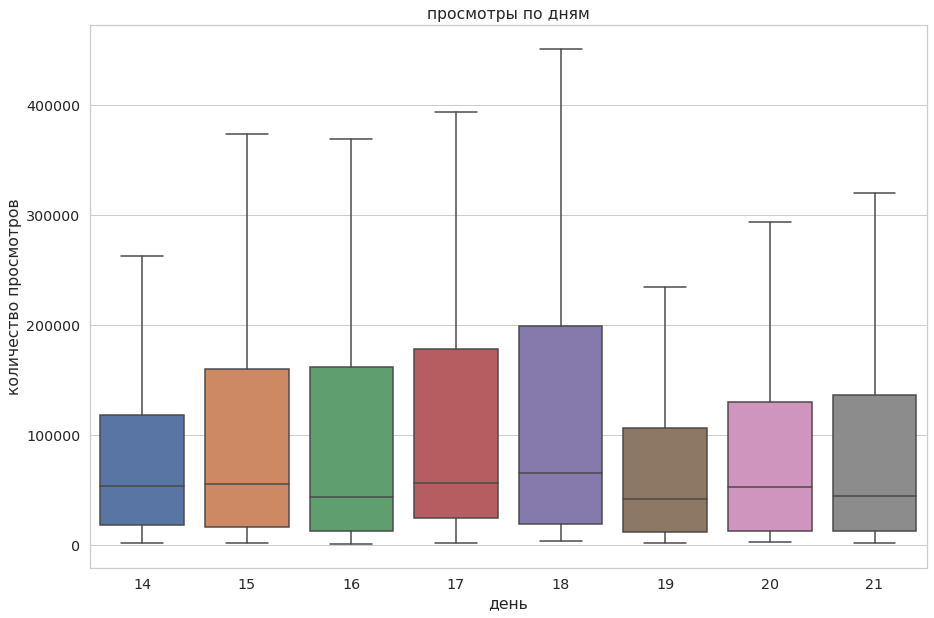

In [367]:
plt.figure(figsize=(15,10))
sns.boxplot(x='trending_date', y='views', data=videos, showfliers=False)
plt.xlabel('день')
plt.ylabel('количество просмотров')
plt.title('просмотры по дням')
plt.show()

Постройте jointplot по всем данным для количества просмотров по горизонтальной оси и количества лайков по вертикальной. Насколько информативен такой график?

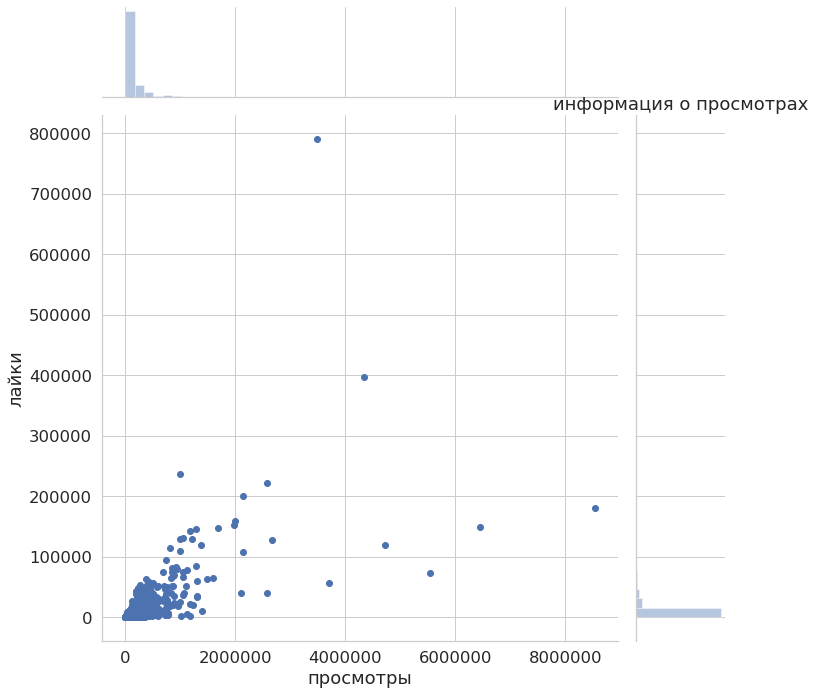

In [368]:
with sns.plotting_context("notebook", font_scale=1.5):
    plot = sns.jointplot(x='views', y='likes', data=videos, height=10);
    plot.ax_joint.set(xlabel='просмотры', ylabel='лайки')
    plot.ax_marg_y.set(title='информация о просмотрах')

Исправьте этот недостаток.

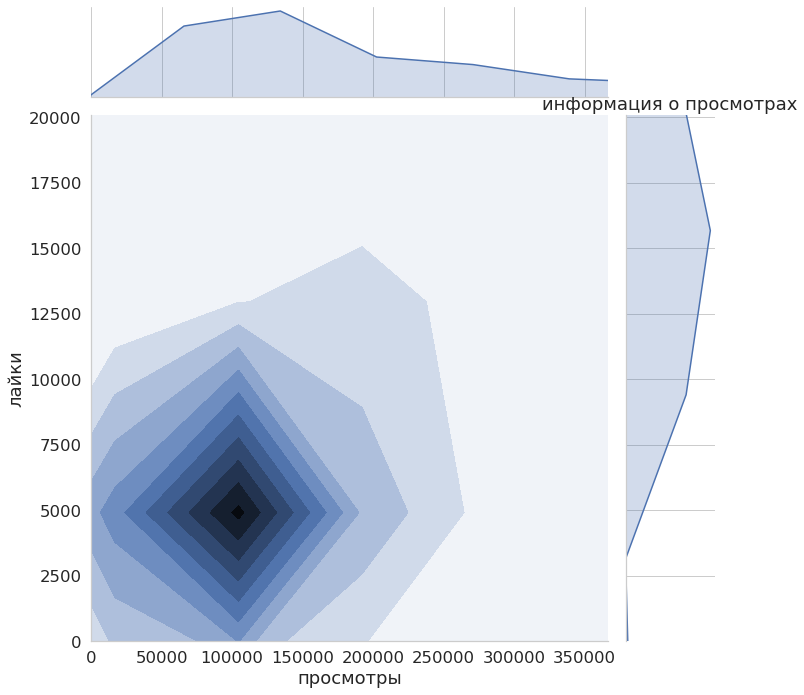

In [369]:
xlimit = videos['views'].quantile(0.9)
ylimit = videos['likes'].quantile(0.9)

with sns.plotting_context("notebook", font_scale=1.5):
    plot = sns.jointplot(x='views', y='likes', data=videos, kind='kde', height=10);
    plot.ax_joint.set_xlim(0, xlimit);
    plot.ax_joint.set_ylim(0, ylimit);
    plot.ax_joint.set(xlabel='просмотры', ylabel='лайки')
    plot.ax_marg_y.set(title='информация о просмотрах')

*Объяснение*: выбросы не дают возможность судить о зависимости, поэтому их отбрасываем
              Также более наглядной является аппроксимация распределения плотности


---
## Сложная часть

### Задача 3

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  


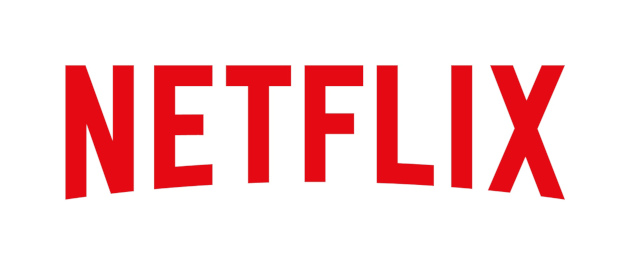

Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.


Загрузите данные, выполнив код ниже.

In [370]:
# код ниже менять нельзя (кроме пути до данных), просто запустите ячейку!
data = pd.read_csv('./netflix_data.csv', encoding='cp437')
del data['ratingDescription'], data['user rating size']

Удалите из данных дупликаты. Сколько объектов удалено?

In [371]:
count = len(data.index)
data.drop_duplicates(inplace=True)
count -= len(data.index)
count

500

In [372]:
data.isna().mean()

title                0.000
rating               0.000
ratingLevel          0.066
release year         0.000
user rating score    0.488
dtype: float64

Сколько объектов осталось?

In [373]:
len(data.index)

500

Сколько рейтинговых групп представлено в данных?

In [374]:
data['rating'].nunique()

13

Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.

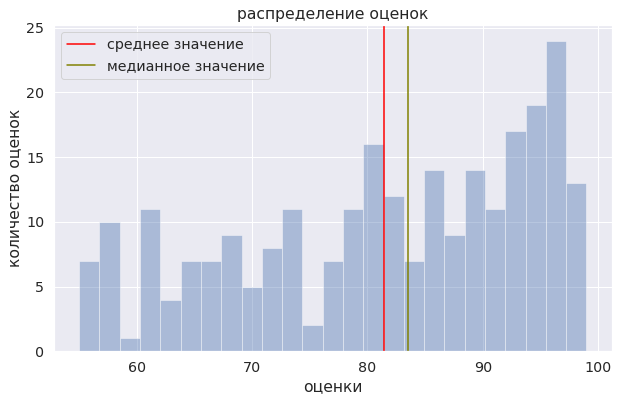

In [375]:
mean = data['user rating score'].mean()
median = data['user rating score'].median()
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(10, 6))
    plot = sns.distplot(data['user rating score'], bins=25, kde=False)
    plot.set(xlabel='оценки',ylabel='количество оценок', title='распределение оценок')
    plt.axvline(mean).set(color='red', label='среднее значение')
    plt.axvline(median).set(color='olive', label='медианное значение')
    plt.legend()

**Вывод:** чаще пользователи ставят оценки выше, причём в среднем около 80 баллов (незначительная разность между медианой и средним арифметическим позволяет считать это правдой)

Выведите основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. Отличаются ли медиана и среднее? Могут ли данные характеристики значительно отличаться? Почему?

In [376]:
data['user rating score'].describe().loc[['mean','std','min','max','50%']]

mean    81.398438
std     12.730904
min     55.000000
max     99.000000
50%     83.500000
Name: user rating score, dtype: float64

**Ответ:** в нашем случае медиана и среднее почти не отличаются
           Отличия возможны, если присутствуют выбросы - тогда среднее окажется сдвинуто в их сторону (например,              такая ситуация возможна при наличии голосов ботов)

В какие годы были запущены шоу, представленные в датасете?

In [377]:
data['release year'].unique()

array([2004, 2006, 2016, 2008, 2014, 2013, 2017, 2015, 2011, 2009, 2007,
       2012, 2003, 2001, 2010, 1998, 1999, 1978, 2005, 1993, 2002, 1976,
       1989, 1996, 1997, 2000, 1994, 1982, 1990, 1940, 1986, 1995, 1991,
       1992, 1987])

Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?

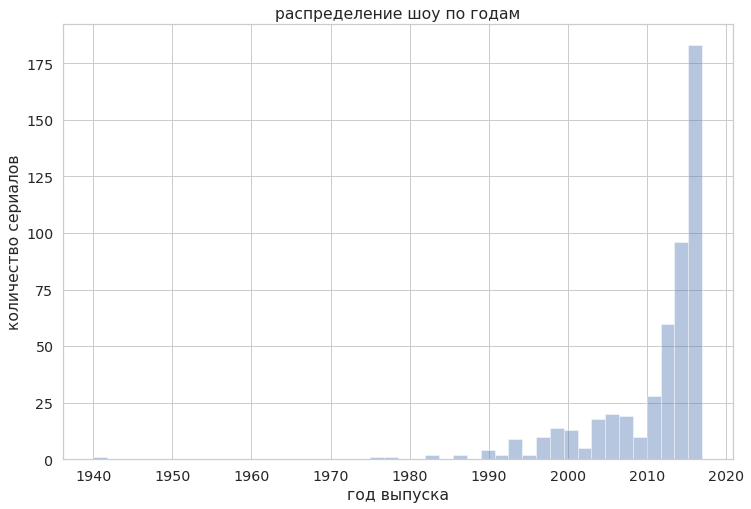

In [378]:
released_shows = pd.DataFrame(data['release year'].value_counts())
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(12, 8))
    plot = sns.distplot(data['release year'], kde=False)
    plot.set(xlabel='год выпуска', ylabel='количество сериалов', title='распределение шоу по годам')

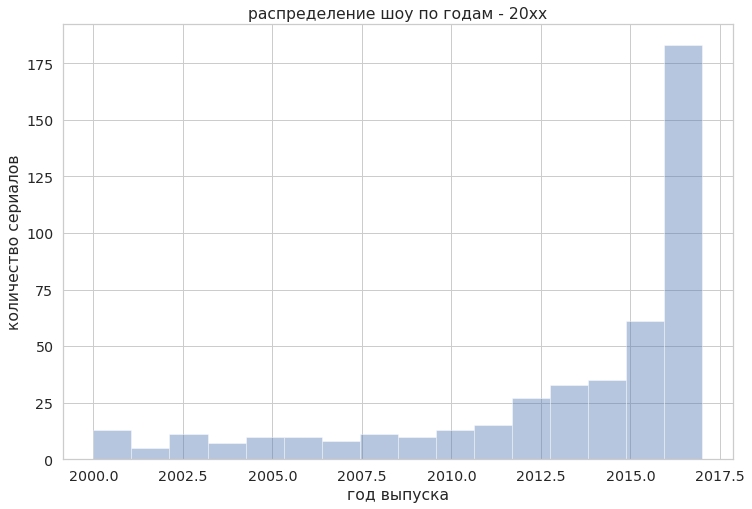

In [379]:
released_shows = pd.DataFrame(data['release year'].value_counts())
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(12, 8))
    plot = sns.distplot(data[data['release year'] >= 2000]['release year'], kde=False)
    plot.set(xlabel='год выпуска', ylabel='количество сериалов', title='распределение шоу по годам - 20хх')

**Вывод:** по графикам видно, что рост количества сериалов похож на экспоненциальный, причём в последние десятилетия флуктуация меньше

Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки)
Ответить на этот вопрос вам поможет график, который вы построили выше.

In [380]:
mean2016 = data[data['release year'] == 2016]['user rating score'].mean()
round(mean2016, 2)

84.31

In [381]:
mean2017 = data[data['release year'] == 2017]['user rating score'].mean()
round(mean2017, 2)

88.12

**Вывод:** мы не можем сделать выводы, т.к. средняя оценка поменялась слишком незначительно, что можно списать на ошибки в данных

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройтре самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

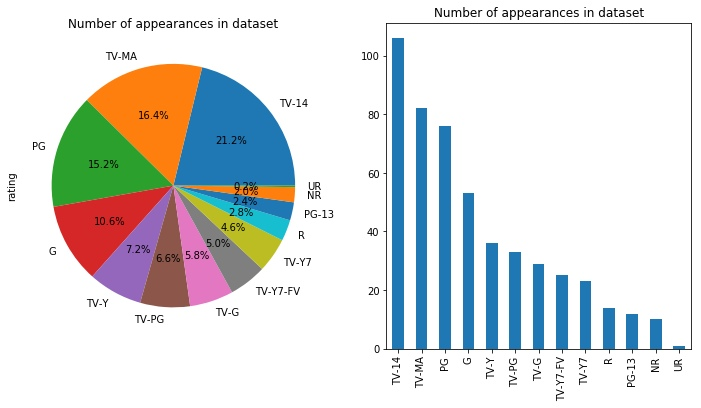

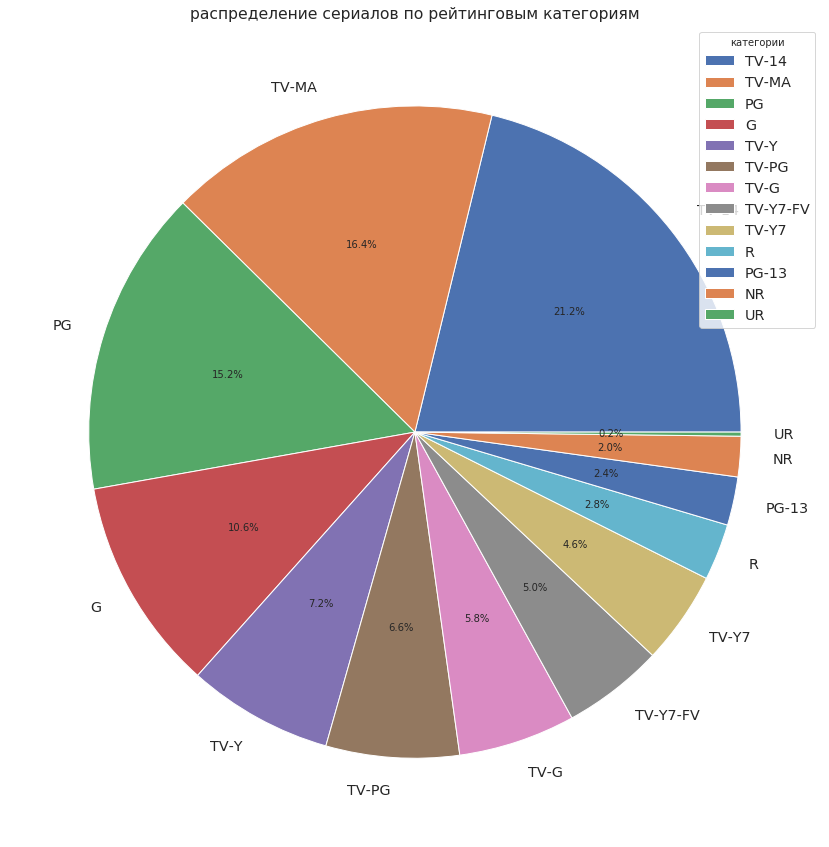

In [382]:
ratios = data.groupby('rating').count().sort_values('title', ascending=False)
ratios = ratios.reset_index()[['rating', 'title']]
ratios.columns = ['rating', 'count']
ratios['count'] = ratios['count']/ratios['count'].sum()
ratios
with sns.axes_style('whitegrid'):
    plt.figure(figsize=(15,15))
    legend, _, _ = plt.pie(ratios['count'], labels=ratios['rating'], autopct='%1.1f%%')
    plt.legend(legend, ratios['rating'], loc='upper right', title='категории')
    plt.title('распределение сериалов по рейтинговым категориям')

**Вывод:** Нетфликс более ориентированы на подростковую и взрослую возрастные группы, о чём можно судить по                  большому проценту соответствующих сериалов

Составьте топ-13 самых высоко оцененных шоу. Выберите из данного топа шоу, которое вам наиболее нравится (либо используйте `scipy.stats.randint`). Обозначим это шоу N.
Ответьте на следующие вопросы:  
* Какое шоу является худшим по оценкам в рейтинговой группе, к которой принадлежит N?  
* Сколько шоу было выпущено в одном году с N?  
* Насколько бы изменилась средняя оценка шоу, выпущенных в одном году с N, если бы Netflix не запустили шоу N?

In [383]:
top_shows = data.sort_values('user rating score', ascending=False).head(13)
top_shows

,title,rating,ratingLevel,release year,user rating score
41,13 Reasons Why,TV-MA,For mature audiences. May not be suitable for...,2017,99.0
350,Lost,TV-14,Parents strongly cautioned. May be unsuitable ...,2010,98.0
10,Once Upon a Time,TV-PG,Parental guidance suggested. May not be suitab...,2016,98.0
64,Friends,TV-14,Parents strongly cautioned. May be unsuitable ...,2003,98.0
72,Orange Is the New Black,TV-MA,For mature audiences. May not be suitable for...,2016,98.0
27,The Flash,TV-PG,Parental guidance suggested. May not be suitab...,2016,98.0
25,Marvel's Iron Fist,TV-MA,NaN,2017,98.0
88,Finding Dory,PG,mild thematic elements,2016,98.0
62,Family Guy,TV-MA,For mature audiences. May not be suitable for...,2015,98.0
63,Criminal Minds,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0


In [315]:
N_index = 8
N = data.iloc[N_index]

In [316]:
min_score = data[data['rating'] == N['rating']]['user rating score'].idxmin()
worst = data.loc[min_score]
worst

title                                                           Bitten
rating                                                           TV-MA
ratingLevel          For mature audiences.  May not be suitable for...
release year                                                      2016
user rating score                                                   56
Name: 380, dtype: object

In [317]:
same_year = data[data['release year'] == N['release year']]
number_of_shows = len(same_year)
number_of_shows

61

In [318]:
old_average = same_year['user rating score'].mean()
new_average = same_year[same_year['title'] != N['title']]['user rating score'].mean()
new_average - old_average

-0.49193548387096087

Ответьте на следующие вопросы при помощи `boxplot`:
* Какую рейтинговую группу зрители оценивали выше всего в последние пять лет? 
* Как менялись оценки пользователей с течением времени? Постройте `boxplot` для каждого десятилетия.

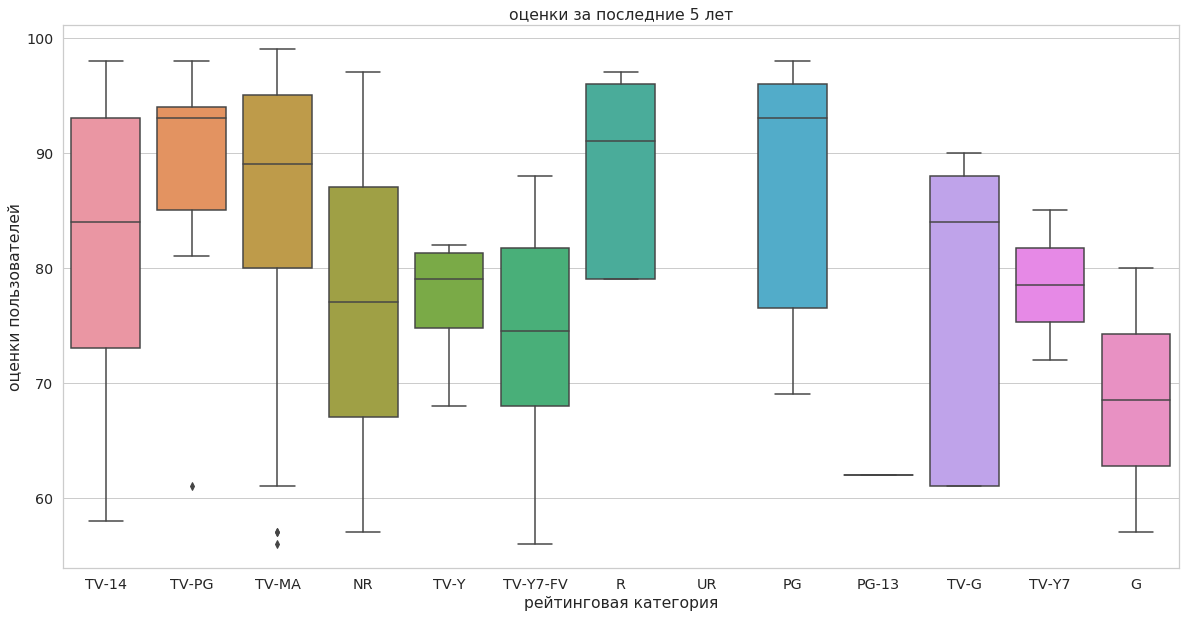

In [319]:
plt.figure(figsize=(20, 10))
with sns.axes_style('whitegrid'):
    plot = sns.boxplot(x='rating', y='user rating score',
                       data=data[data['release year'] > data['release year'].max() - 5])
    plot.set(xlabel='рейтинговая категория',ylabel='оценки пользователей',title='оценки за последние 5 лет')

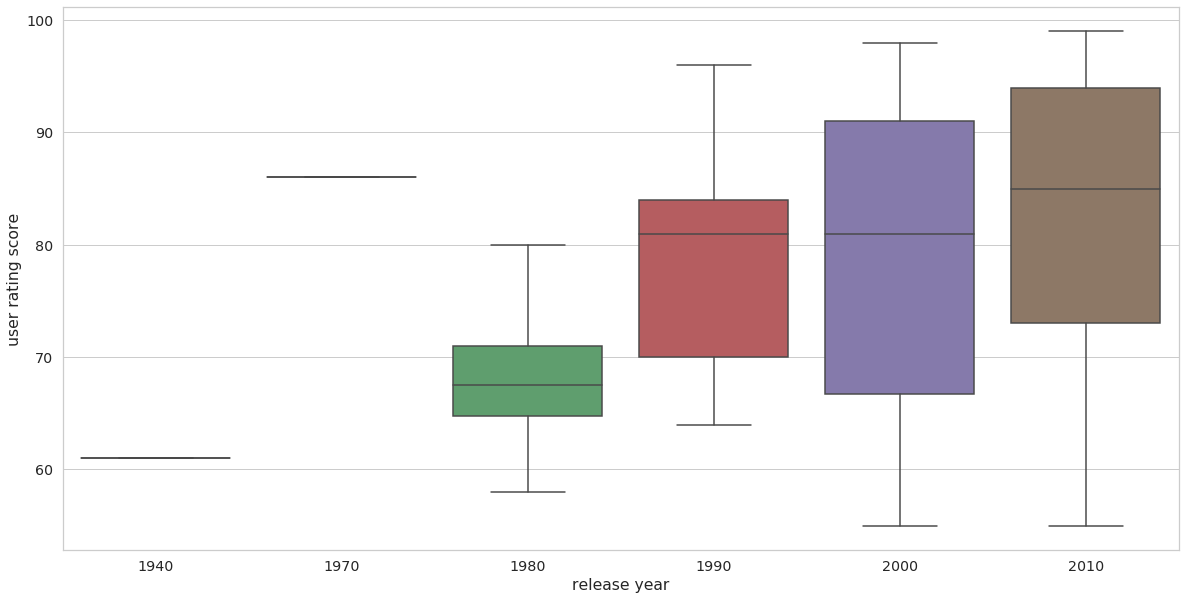

In [320]:
plt.figure(figsize=(20, 10))
with sns.axes_style('whitegrid'):
    sns.boxplot(x=data['release year'] // 10 * 10, y=data['user rating score'])
    plot.set(xlabel='десятилетие',ylabel='оценки пользователей',title='распределение по десятилетиям')

**Вывод:** за последние 5 лет выше всего была оценена категория PG (хотя максимум достигнут у TV-MA)
           Также можно утверждать, что средняя оценка выросла с 80х годов до нынешнего времени

---
### Задача 4

В данной задаче вам нужно будет продолжить анализ данных о видео на YouTube. Информация об имени категории видео содержится в файле `RU_category_id.json`. Следующий код читает этот файл, извлекает из него необходимую информацию, и записывает в виде `pandas`-таблицы.

In [321]:
import json

with open('./RU_category_id.json') as json_file:
    json_data = json.load(json_file)
    
category = pd.DataFrame(columns=['id', 'name'])

for item in json_data['items']:
    category = category.append(
        {'id': int(item['id']),
         'name': item['snippet']['title']},
        ignore_index=True
    )
    
category['id'] = category['id'].astype(int)
category

,id,name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [322]:
videos

,trending_date,category_id,views,likes,dislikes,comment_count
0,14,22,62408,334,190,50
1,14,22,330043,43841,2244,2977
2,14,24,424596,49854,714,2944
3,14,22,112851,3566,122,80
4,14,24,243469,36216,631,1692
...,...,...,...,...,...,...
1595,21,2,5498,373,19,49
1596,21,2,40394,1339,179,201
1597,21,25,3516,65,7,4
1598,21,25,47507,4372,231,2380


Добавьте к вашим данным имена категорий с помощью `pd.merge`.

In [323]:
videos = pd.merge(videos, category, left_on='category_id', right_on='id')
videos = videos.drop(['category_id', 'id'], axis=1)\
               .rename(columns={'name' : 'category'})
videos

,trending_date,views,likes,dislikes,comment_count,category
0,14,62408,334,190,50,People & Blogs
1,14,330043,43841,2244,2977,People & Blogs
2,14,112851,3566,122,80,People & Blogs
3,14,97006,2259,330,887,People & Blogs
4,14,148974,5434,5247,1612,People & Blogs
...,...,...,...,...,...,...
1516,19,9211,325,14,31,Travel & Events
1517,20,135817,5714,331,781,Travel & Events
1518,20,44074,883,36,152,Travel & Events
1519,20,6985,306,16,317,Travel & Events


Составьте сводную таблицу о количестве просмотров по дням для каждой категории видео с помощю функции `pivot_table`.

In [324]:
pivot = pd.pivot_table(videos, values = ['views'], index=['category'], columns=['trending_date'])
pivot.columns = pivot.columns.droplevel()

Визуализируйте таблицу с помощью `heatmap`. Для информативности поделите все числа на $10^6$.

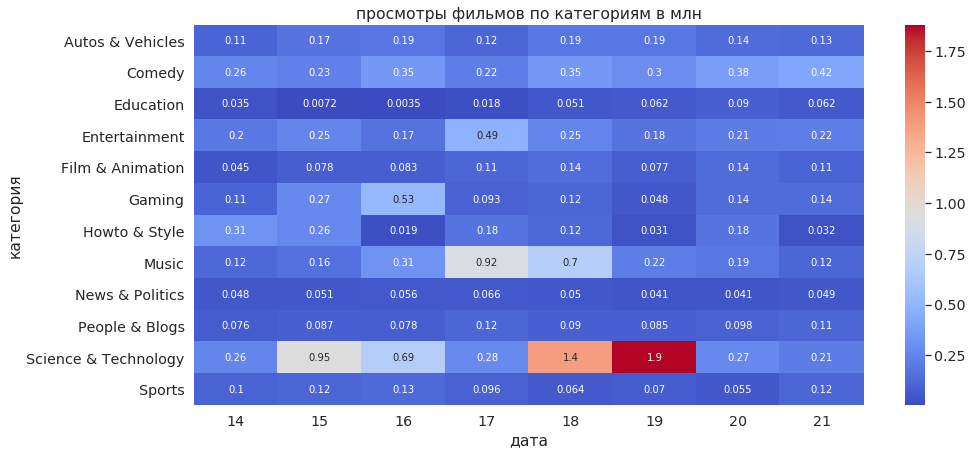

In [325]:
plt.figure(figsize=(15,7))
plot = sns.heatmap(pivot.dropna() / 1000000, annot=True, cmap='coolwarm')
plot.set(xlabel='дата',ylabel='категория',title='просмотры фильмов по категориям в млн')
plt.show()

Сделайте аналогичную сводную таблицу, добавив суммы по строкам и столбцам, назвав их "Всего просмотров".

In [326]:
pivot_total = pd.pivot_table(videos, values = ['views'], index=['category'], columns=['trending_date'],
                             aggfunc=np.sum, margins=True, margins_name='Всего просмотров')
pivot_total.columns = pivot_total.columns.droplevel()

В чем проблема с информативностью подобных таблиц? Исправьте это.

*Подсказка*: посмотрите на графики, которые вы построили ранее. 

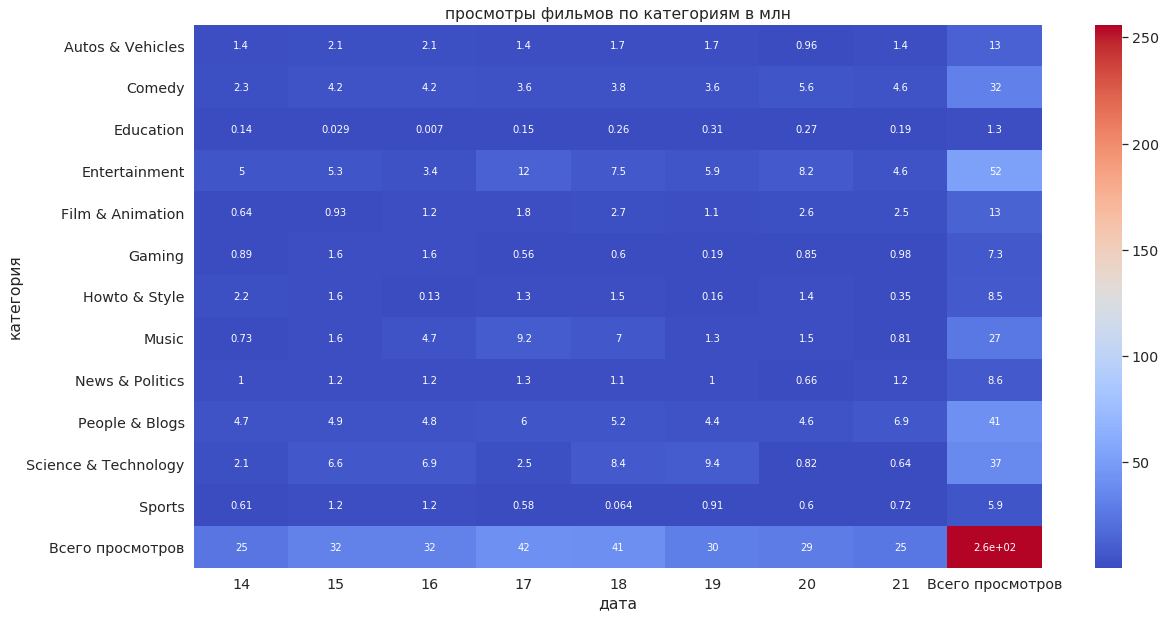

In [327]:
plt.figure(figsize=(19,10))
plot = sns.heatmap(pivot_total.dropna() / 1000000, annot=True, cmap='coolwarm')
plot.set(xlabel='дата',ylabel='категория',title='просмотры фильмов по категориям в млн')
plt.show()

**Вывод:** такие таблицы не позволяют нормально определить тенденции, т.к. внимание рассеивается на конкретные                значения
           Введение же в качестве дополнительного поля среднего_значения позволяет увидеть зависимость по дням для            просмотров в целом

---

### Задача 5

Yelp (yelp.com) — веб-сайт для поиска на местном рынке услуг, например ресторанов или парикмахерских, с возможностью добавлять и просматривать рейтинги и обзоры этих услуг. Для популярных бизнесов имеются сотни обзоров. Для обозревателей на сайте предусмотрены элементы социальной сети.

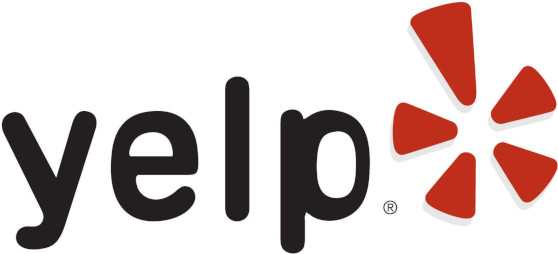

_____________

Вам предоставляется следующая информация о компаниях на Yelp:

Файл `yelp_business.csv`:
* `business_id` — уникальный идентификатор компании;
* `name` — имя компании;
* `address`, `city`, `state` — месторасположении компании;
* `latitude`, `longitude` — географические координаты;
* `categories` — категории услуг компании.

Файл `yelp_review.csv`, содержащий оценки пользователей:
* `business_id` — идентификатор компании, соответствующий файлу `yelp_business.csv`;
* `stars` — поставленная пользователем оценка от 1 до 5.

В целях сокращения объема файла, текстовые отзывы пользователей не были включены.

Оригинальную версию датасета в формате json можно посмотреть по ссылке
https://www.kaggle.com/yelp-dataset/yelp-dataset/data

_____________

**Что нужно сделать:** 

* Найти город с наибольшим количеством компаний;
* Для этого города определить районы с наиболее качественными услугами. Пример с несколько другой задачей: https://yandex.ru/company/researches/2017/msk_mobile_map
* А также найти рестораны с наилучшими отзывами.

------

#### Город с наибольшим количеством компаний

Загрузите данные из файла `yelp_business.csv` с помощью функции `pd.read_csv`. Посмотрите на первые несколько строк с помощью метода `head`.

In [328]:
yelp_business = pd.read_csv('yelp_business.csv').drop(['Unnamed: 0', 'neighborhood', 'postal_code', 'is_open'], axis=1)
yelp_business.head(5)

,business_id,name,address,city,state,latitude,longitude,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""","""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,33.330690,-111.978599,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""","""3101 Washington Rd""",McMurray,PA,40.291685,-80.104900,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""","""6025 N 27th Ave, Ste 1""",Phoenix,AZ,33.524903,-112.115310,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""","""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,33.383147,-111.964725,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",Cuyahoga Falls,OH,41.119535,-81.475690,American (New);Nightlife;Bars;Sandwiches;Ameri...


Найдите пять городов, по которым присутствует информация о наибольшем количестве компаний. Для этого стоит воспользоваться методами `groupby`, `count`, `sort_values`, `head`. В таблице должен быть указан город (название) и количество компаний в этом городе.

In [329]:
top = yelp_business[['name', 'city']].groupby('city').count().sort_values('name', ascending=False)\
    .rename(columns={'name':'number_of_companies'}).head(5).reset_index()
top

,city,number_of_companies
0,Las Vegas,26775
1,Phoenix,17213
2,Toronto,17206
3,Charlotte,8553
4,Scottsdale,8228


Пусть N -- город с наибольшим количеством компаний.

Оставьте в таблице только записи, соответствующие городу N. Нанесите все эти компании на график, в котором по оси $x$ отметьте долготу, а по оси $y$ -- долготу.

In [330]:
N = top.iloc[0]['city']
N

'Las Vegas'

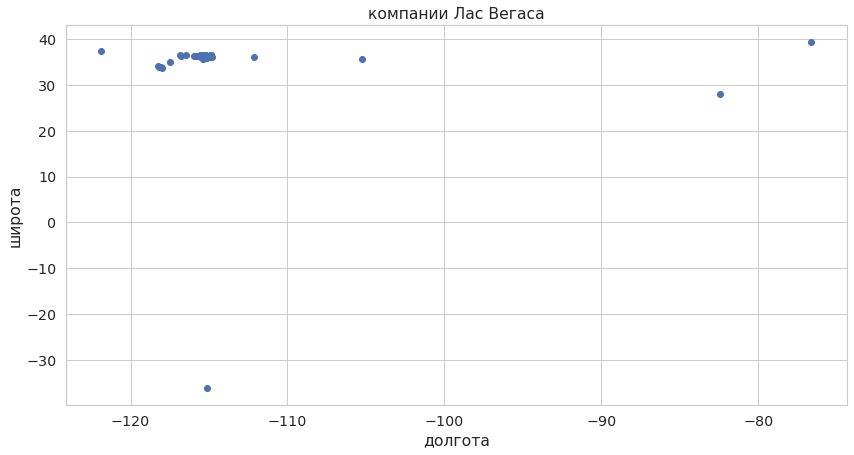

In [331]:
LV_business = yelp_business[yelp_business['city'] == N]
plt.figure(figsize=(14,7))
plt.scatter(LV_business['longitude'], LV_business['latitude'])
plt.xlabel('долгота')
plt.ylabel('широта')
plt.title('компании Лас Вегаса')
plt.show()

Сам город находится в сгустке точек. Есть какие-то компании, которые приписаны к этому городу, но находятся далеко от него. Избавьтесь от них, подобрав некоторые границы значений широты и долготы. Изобразите все компании на новом графике. 

На этом графике должны выделяться некоторые улицы. Откройте карту города N и сравните ее с построенным графиком.

Попробуйте также автоматически подгружать карту города в качестве фона графика. <a href="https://plotly.com/python/scattermapbox/">Примеры.</a>

In [332]:
geo_mask = (LV_business['latitude'] <= 36.5) & (LV_business['latitude'] >= 35.9) &\
           (LV_business['longitude'] <= -114.9) & (LV_business['longitude'] >= -115.5)
LV_business = LV_business[geo_mask]

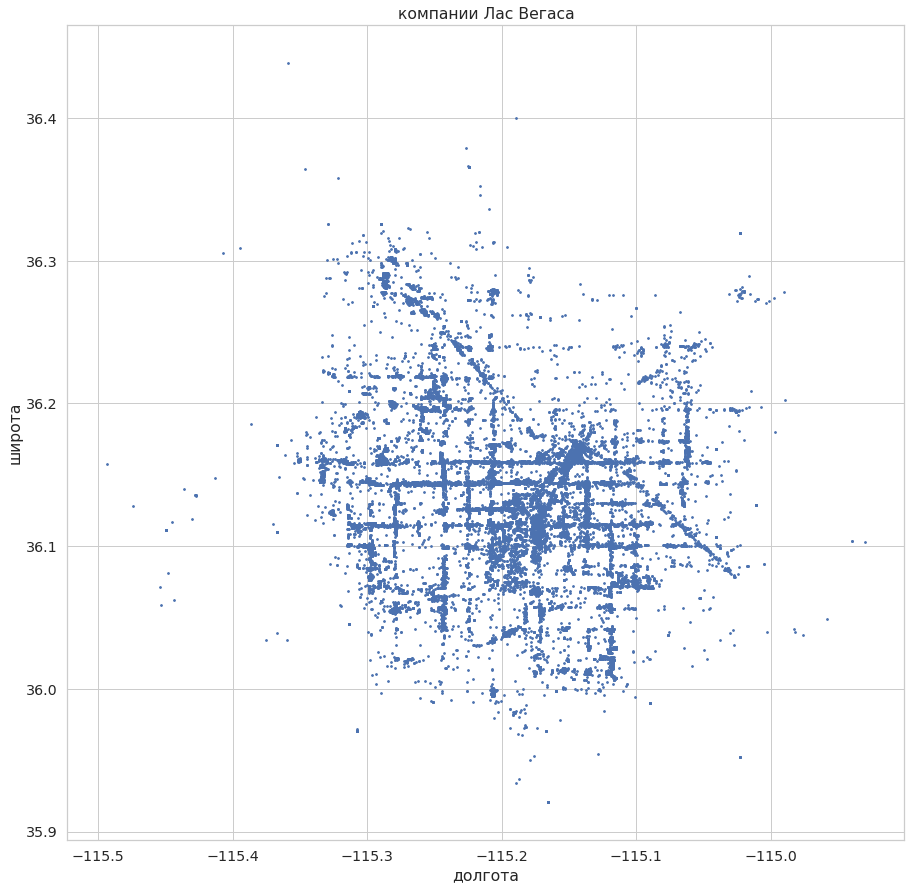

In [333]:
plt.figure(figsize=(15,15))
plt.scatter(LV_business['longitude'], LV_business['latitude'], s=3)
plt.xlabel('долгота')
plt.ylabel('широта')
plt.title('компании Лас Вегаса')
plt.show()

#### Оценки компаний

Для выполнения задания нужно посчитать среднюю оценку каждой компании, а также количество выставленных оценок.

Загрузите таблицу оценок `yelp_review.csv`.

In [334]:
yelp_review = pd.read_csv('yelp_review.csv').iloc[:, 1:]
yelp_review.head(5)

,business_id,stars
0,AEx2SYEUJmTxVVB18LlCwA,5
1,VR6GpWIda3SfvPC-lg9H3w,5
2,CKC0-MOWMqoeWf6s-szl8g,5
3,ACFtxLv8pGrrxMm6EgjreA,4
4,s2I_Ni76bjJNK9yG60iD-Q,4


В подгруженной таблице оценок оставьте только компании города N. Для этого установите значения `business_id` в качестве индекса у таблицы оценок и воспользуйтесь методом `loc`. Чтобы индекс снова сделать полем таблицы, можно воспользоваться методом `reset_index`.

In [335]:
yelp_review = yelp_review.set_index('business_id')
companies = LV_business['business_id'].values
yelp_review = yelp_review.loc[yelp_review.index.isin(companies)].reset_index()

In [336]:
yelp_review.head()

,business_id,stars
0,8QWPlVQ6D-OExqXoaD2Z1g,5
1,pLZ9oZM8c6MNbRlg06lBPg,1
2,6Q7-wkCPc1KF75jZLOTcMw,2
3,9Jc3W0aR9Xf2gcHI0rEXsw,1
4,xVEtGucSRLk5pxxN0t4i6g,5


Теперь посчитайте среднюю оценку каждой компании, а также количество выставленных компании оценок. Помочь в этом могут функции `groupby` и `aggregate([np.mean, np.size])`.

In [337]:
info = yelp_review.groupby('business_id').aggregate([np.mean, np.size])
info.head()

stars      
                            mean  size
business_id                           
--9e1ONYQuAa-CB_Rrw7Tw  4.088904  1451
--DdmeR16TRb3LsjG0ejrQ  3.200000     5
--WsruI0IGEoeRmkErU5Gg  4.928571    14
--Y7NhBKzLTbNliMUX_wfg  4.875000     8
--e8PjCNhEz32pprnPhCwQ  3.473684    19

Назовите колонки таблицы красивыми именами, изменив `<имя таблицы>.columns`, после чего напечатайте несколько строк полученной таблицы.

In [338]:
info.columns = info.columns.droplevel()
info.columns = ['stars', 'count']
info.head()

,stars,count
business_id,,
--9e1ONYQuAa-CB_Rrw7Tw,4.088904,1451
--DdmeR16TRb3LsjG0ejrQ,3.200000,5
--WsruI0IGEoeRmkErU5Gg,4.928571,14
--Y7NhBKzLTbNliMUX_wfg,4.875000,8
--e8PjCNhEz32pprnPhCwQ,3.473684,19


Соедините две полученные ранее таблицы по компаниям города N в одну.
Для этого сначала установите поле `business_id` в качестве индекса в обеих таблицах с помощью `set_index` (в одной из них это уже должно было быть сделано).
Соединение таблиц можно выполнить с помощью `join`.
Индексы у этих таблиц одинаковые, так что тип джойна не имеет значения.
В полученной таблице должны получится поля `latitude`, `longitude`, `categories`, `name`, `stars`, `count`.

In [339]:
data = yelp_business.set_index('business_id').join(info).dropna()
data = data[['latitude', 'longitude', 'categories', 'name', 'stars', 'count']]
data.head()

,latitude,longitude,categories,name,stars,count
business_id,,,,,,
kCoE3jvEtg6UVz5SOD3GVw,36.207430,-115.268460,Real Estate Services;Real Estate;Home Services...,"""BDJ Realty""",4.000000,5.0
OD2hnuuTJI9uotcKycxg1A,36.197484,-115.249660,Shopping;Sporting Goods,"""Soccer Zone""",1.444444,9.0
VBHEsoXQb2AQ76J9l8h1uQ,36.085051,-115.119421,Shopping;Jewelry;Watch Repair;Local Services,"""Alfredo's Jewelry""",4.739130,23.0
1Jp_hmPNUZArNqzpbm7B0g,36.056382,-115.269332,Home Services;Lighting Fixtures & Equipment;Lo...,"""Task Electric""",4.450000,20.0
DPQnTnNw2PJj7DdENM98Cw,36.105196,-115.056880,Nurseries & Gardening;Home & Garden;Shopping,"""Star Nursery""",3.680000,25.0


Изобразите все компании на графике, раскрасив точку в цвет, оттенок которого соответствует средней оценке компании. Прозрачность точки выставляйте не более $0.3$.

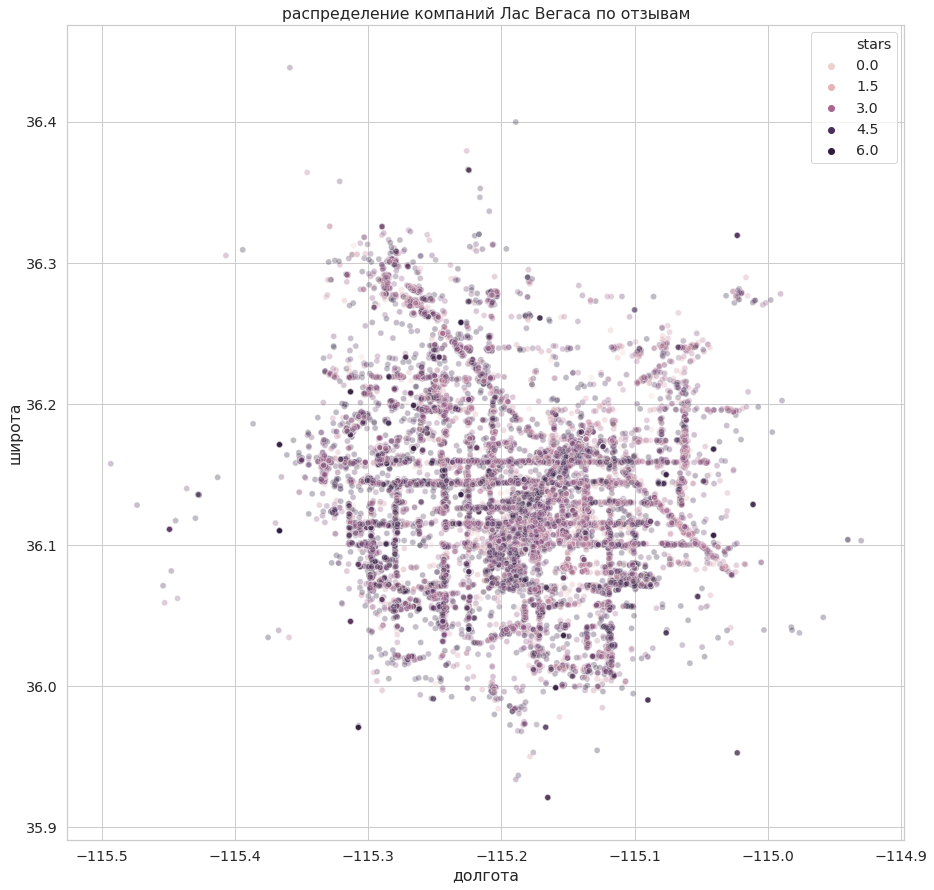

In [340]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='longitude', y='latitude', hue='stars', data=data, alpha=0.3)
plt.xlabel('долгота')
plt.ylabel('широта')
plt.title('распределение компаний Лас Вегаса по отзывам')
plt.show()

Чтобы получить районы города, округлите значения широты и долготы, подобрав оптимальный размер района. Например, можно сделать так
`np.round(долгота*4, decimals=1)*0.25`.

In [341]:
data_by_area = data
data_by_area['longitude'] = np.round(data_by_area['longitude']*4, decimals=1)*0.25
data_by_area['latitude'] = np.round(data_by_area['latitude']*4, decimals=1)*0.25

Для получения средней оценки компании по району постройте сводную таблицу при помощи `pd.pivot_table`, взяв в качестве индексов и колонок округленные широту и долготу, а в качестве значений -- оценки. Аггрегирующей функцией является среднее.

Изобразите полученную таблицу при помощи `sns.heatmap`.

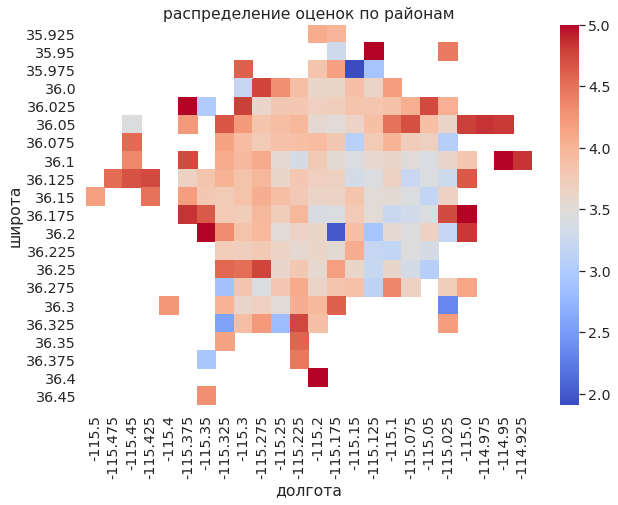

In [342]:
info = pd.pivot_table(data_by_area, index=['latitude'], columns=['longitude'],
                      values=['stars'], aggfunc=[np.mean])
info.columns = info.columns.droplevel().droplevel()
plt.figure(figsize=(10,7))
plot = sns.heatmap(info, cmap='coolwarm')
plot.set(xlabel='долгота',ylabel='широта',title='распределение оценок по районам')
plt.show()

Полученный график имеет ряд недостатков. Во-первых, не очень правильно судить о районе, если в нем мало компаний. Во-вторых,  на графике цветовая гамма автоматически подстроилась под минимальное и максимальное значения оценки.

Почему эти недостатки могут быть существенными?

**Ответ:** Малое число компаний не позволяет справедливо оценить положение вещей в районе, т.к. велика                        статистическая ошибка
           Авто-подстраивание под мин./макс. значения ведёт к тому, что внимание акцентируется нас выбросах, и                становится тяжелее делать более тонкие и важные выводы 

Оставьте районы, в которых имеется информация о не менее $30$ компаний. Постройте новый график районов, использовав параметры `vmin` и `vmax` у функции `sns.heatmap`.

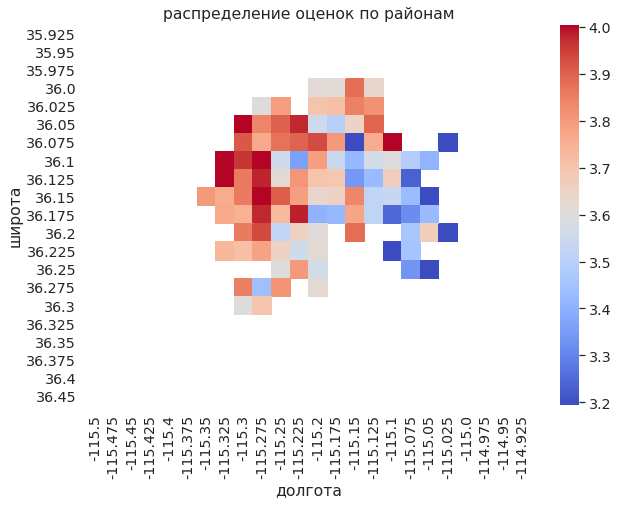

In [343]:
good_areas = pd.pivot_table(data_by_area, index=['latitude'], columns=['longitude'],
                            values=['stars'], aggfunc='count')
good_areas.columns = good_areas.columns.droplevel()
mask = good_areas < 30
good_areas = info.mask(mask)
min_anchor = np.nanpercentile(good_areas.to_numpy(), 5)
max_anchor = np.nanpercentile(good_areas.to_numpy(), 95)

plt.figure(figsize=(10,7))
plot = sns.heatmap(good_areas, cmap='coolwarm', vmin=min_anchor, vmax=max_anchor)
plot.set(xlabel='долгота',ylabel='широта',title='распределение оценок по районам')
plt.show()

Сравните полученный график с предыдущим и сделайте вывод.

**Вывод:** Данный график показал, что в среднем на западе компании оценены выше - судить об этом по предыдущему              было невозможно

#### Рестораны

Будем считать компанию рестораном, если в поле `categories` *содержится* слово `Restaurant`. Составьте таблицу, в которой будет информация о всех ресторанах города N, для которых имеется не менее $5$ отзывов. Далее постройте график районов, в котором каждому району сопоставьте среднюю оценку по ресторанам этого района. Рассматривайте только те районы, в которых есть не менее $10$ ресторанов, для каждого из которых есть не менее $5$ отзывов.

In [344]:
restaurants = data_by_area[data_by_area['categories'].str.contains('Restaurant')]
reviewed_restaurants = restaurants[restaurants['count'] >= 5.0]
reviewed_restaurants.head()

,latitude,longitude,categories,name,stars,count
business_id,,,,,,
Pd52CjgyEU3Rb8co6QfTPw,36.075,-115.175,Nightlife;Bars;Barbeque;Sports Bars;American (...,"""Flight Deck Bar & Grill""",3.769231,13.0
4srfPk1s8nlm1YusyDUbjg,36.075,-115.125,Fast Food;Restaurants;Sandwiches,"""Subway""",2.666667,6.0
n7V4cD-KqqE3OXk0irJTyA,36.075,-115.175,Arcades;Arts & Entertainment;Gastropubs;Restau...,"""GameWorks""",3.117479,349.0
Wpt0sFHcPtV5MO9He7yMKQ,36.125,-115.100,Restaurants;Fast Food;Burgers,"""McDonald's""",2.150000,20.0
W1Yr6c2XDx_RBjb6WsV-aQ,36.175,-115.200,Restaurants;Cafes;American (New);Bars;Nightlif...,"""Divine Cafe at the Springs Preserve""",4.050000,140.0


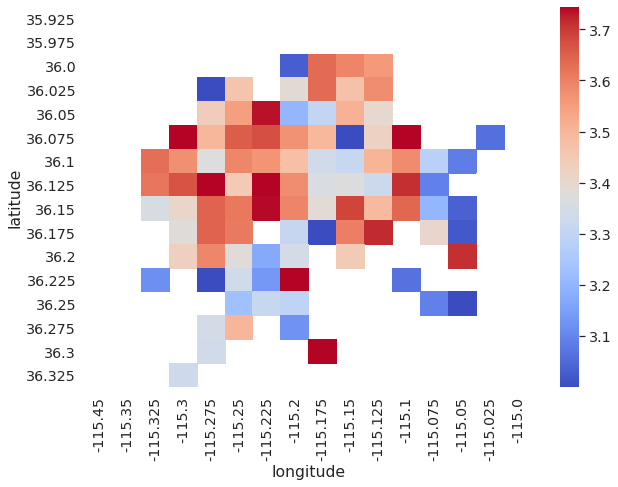

In [345]:
areas = pd.pivot_table(restaurants, index=['latitude'], columns=['longitude'],
                            values=['stars'], aggfunc=[np.mean])
areas.columns = areas.columns.droplevel().droplevel()

mask = pd.pivot_table(reviewed_restaurants, index=['latitude'], columns=['longitude'],
                            values=['stars'], aggfunc='count')
mask.columns = mask.columns.droplevel()
mask = mask < 10

areas = areas.mask(mask)
min_anchor = np.nanpercentile(areas.to_numpy(), 5)
max_anchor = np.nanpercentile(areas.to_numpy(), 95)

plt.figure(figsize=(10,7))
sns.heatmap(areas, cmap='coolwarm', vmin=min_anchor, vmax=max_anchor)
plot.set(xlabel='долгота',ylabel='широта',title='распределение оценок по районам')
plt.show()

Чем полезны ограничения снизу на количество отзывов для ресторана и количество ресторанов в районе?

**Ответ:** позволяют уменьшить статистическую ошибку (при незначительных объёмах информации нельзя делать общие              выводы)

Кот Василий очень придирчив к выбору ресторана. Он доверяет только ресторанам с высоким рейтингом, который основывается на большом количестве отзывов. Напечатайте в виде таблицы информацию $10$ ресторанах с самым большим рейтингом в порядке убывания рейтинга. Для каждого из этих ресторанов должно быть не менее $50$ отзывов. По каждому ресторану необходимо вывести следующую информации: название ресторана, средняя оценка, количество отзывов, географические координаты, категории.

In [346]:
restaurants_for_vasily = data[data['categories'].str.contains('Restaurant')]
restaurants_for_vasily = restaurants_for_vasily[restaurants_for_vasily['count'] >= 50]\
                         .sort_values('stars', ascending=False)
top = restaurants_for_vasily.head(10)
top.reset_index().loc[:, ['name', 'stars', 'count', 'latitude', 'longitude', 'categories']]

,name,stars,count,latitude,longitude,categories
0,"""Lip Smacking Foodie Tours""",4.966480,179.0,36.125,-115.175,Food Tours;Restaurants;Event Planning & Servic...
1,"""Pepito Shack""",4.907692,65.0,36.150,-115.150,Restaurants;Burgers;Food Stands;Sandwiches;Hot...
2,"""Bosa Boba Cafe""",4.890909,55.0,36.125,-115.175,Vietnamese;Bubble Tea;Sandwiches;Food;Coffee &...
3,"""Garden Grill""",4.868132,91.0,36.175,-115.275,Tacos;Street Vendors;Farmers Market;Vegetarian...
4,"""Brew Tea Bar""",4.848069,1165.0,36.050,-115.250,Cafes;Tea Rooms;Food;Bubble Tea;Restaurants;De...
5,"""Poppa Naps BBQ""",4.836538,104.0,36.125,-115.100,Food Stands;Hot Dogs;Caterers;Restaurants;Amer...
6,"""Zenaida's Cafe""",4.833333,180.0,36.100,-115.100,Restaurants;Breakfast & Brunch;Cafes
7,"""El Frescos Cocina Mexicana""",4.816754,191.0,36.100,-115.150,Caterers;Mexican;Restaurants;Food;Event Planni...
8,"""Blaqcat Ultra Hookah Lounge""",4.809524,63.0,36.150,-115.225,Adult Entertainment;Lounges;Hookah Bars;Restau...
9,"""California Sushi Burrito""",4.807018,57.0,36.125,-115.200,Asian Fusion;Fast Food;Restaurants;Japanese;Po...


Нанесите на карту все рестораны со средней оценкой не менее $4.7$, которая посчитана по не менее $50$ отзывам. Отдельным цветом отметьте 10 ресторанов, которые вы получили ранее.

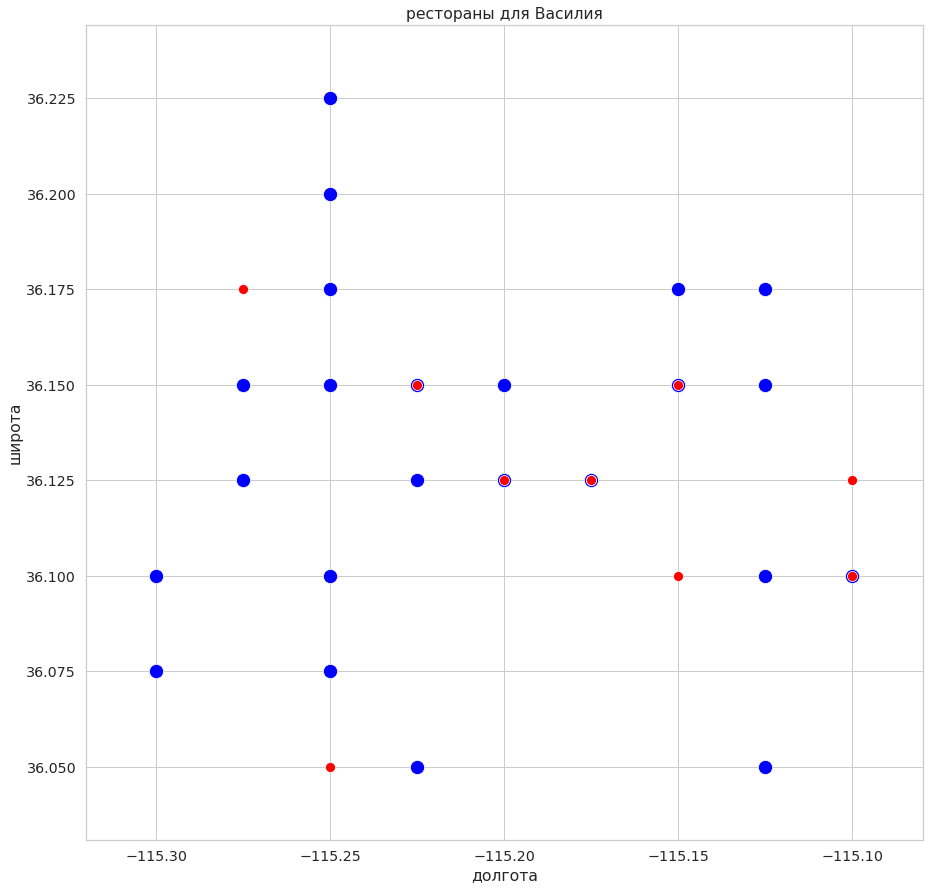

In [347]:
good_restaurants = restaurants_for_vasily[restaurants_for_vasily['stars'] >= 4.7]

plt.figure(figsize=(15,15))
plot = sns.scatterplot(x='longitude', y='latitude', color='blue', data=good_restaurants.iloc[10:], s=200)
sns.scatterplot(x='longitude', y='latitude', color='red', data=top, s=100)
plot.set(xlabel='долгота',ylabel='широта',title='рестораны для Василия')
plt.show()

Охарактеризуйте кота Василия, а также сделайте общий вывод по задаче.

**Вывод:** кот Василий поступает правильно, т.к. ориентируется на данные, подтверждённые многими пользователями (а            следовательно об их качестве действительно можно делать вывод по средней оценке)

**Общий вывод:** усреднение величин по каким-либо областям значений и наличие большой выборки позволяют делать                      применять методы анализа данных для построения успешных моделей